In [ ]:
!pip install ucimlrepo

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

## Download the abalone dataset. Inspect the data structure.

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
abalone = fetch_ucirepo(id=1)

# data (as pandas dataframes)
X = abalone.data.features
y = abalone.data.targets

# metadata
print(abalone.metadata)

# variable information
print(abalone.variables)

{'uci_id': 1, 'name': 'Abalone', 'repository_url': 'https://archive.ics.uci.edu/dataset/1/abalone', 'data_url': 'https://archive.ics.uci.edu/static/public/1/data.csv', 'abstract': 'Predict the age of abalone from physical measurements', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Tabular'], 'num_instances': 4177, 'num_features': 8, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': [], 'target_col': ['Rings'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Mon Aug 28 2023', 'dataset_doi': '10.24432/C55C7W', 'creators': ['Warwick Nash', 'Tracy Sellers', 'Simon Talbot', 'Andrew Cawthorn', 'Wes Ford'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting the age of abalone from physical measurements.  The age of abalone is determined by cutting the shell through the cone, staining it, and counting the number of rings through a microscope -- 

In [ ]:
X

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [ ]:
y

,Rings
0,15
1,7
2,9
3,10
4,7
...,...
4172,11
4173,10
4174,9
4175,10


In [ ]:
y.Rings.max()

29

In [ ]:
# Remove non-sensical data.
y = y[(X.Whole_weight>=X.Shucked_weight+X.Viscera_weight+X.Shell_weight)&(X.Length*X.Diameter*X.Height>0)]
X = X[(X.Whole_weight>=X.Shucked_weight+X.Viscera_weight+X.Shell_weight)&(X.Length*X.Diameter*X.Height>0)]

## I want to know how many entries there are for each sex label, and create train-test split in each sex group. After that, standard-scale the datasets with respect to training set.

In [ ]:
X.Sex.value_counts()

Sex
M    1487
F    1279
I    1255
Name: count, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=X[['Sex']])

In [ ]:
X_train.Sex.value_counts()

Sex
M    1041
F     895
I     878
Name: count, dtype: int64

In [ ]:
X_test.Sex.value_counts()

Sex
M    446
F    384
I    377
Name: count, dtype: int64

In [ ]:
# Reset indices for easier column value assignments later.
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
x_scaler = StandardScaler()

In [ ]:
features_to_scale = ['Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 'Viscera_weight', 'Shell_weight']
x_scaler.fit(X_train[features_to_scale])

StandardScaler()

In [ ]:
features_scaled = [feature+'_scaled' for feature in features_to_scale]
X_train[features_scaled] = x_scaler.transform(X_train[features_to_scale])
X_test[features_scaled] = x_scaler.transform(X_test[features_to_scale])

## Plot 3D scatter plot of the length scales. It seems the length scales can be reduced into one dimension.

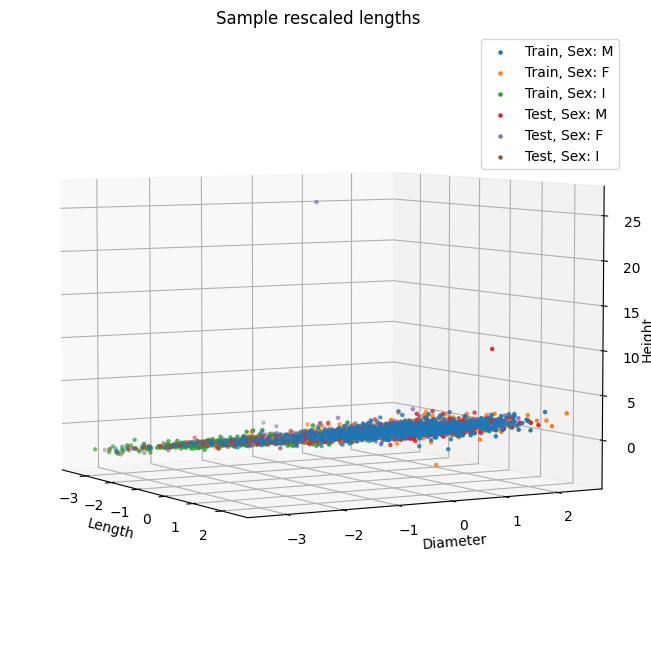

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for sex in ['M', 'F', 'I']:
  ax.scatter(X_train.Length_scaled[X_train.Sex==sex], X_train.Diameter_scaled[X_train.Sex==sex], X_train.Height_scaled[X_train.Sex==sex], marker='.', label=f'Train, Sex: {sex}')
for sex in ['M', 'F', 'I']:
  ax.scatter(X_test.Length_scaled[X_test.Sex==sex], X_test.Diameter_scaled[X_test.Sex==sex], X_test.Height_scaled[X_test.Sex==sex], marker='.', label=f'Test, Sex: {sex}')
ax.set_xlabel('Length')
ax.set_ylabel('Diameter')
ax.set_zlabel('Height')
ax.zaxis.labelpad = -3. #So that the z-label fits in and shows up.
ax.view_init(elev=5, azim=-30, roll=0) #View angle of the 3D plot
plt.legend()
plt.title('Sample rescaled lengths')
plt.show()

In [ ]:
features_pca = ['Length_scaled', 'Diameter_scaled', 'Height_scaled']
pca = PCA(n_components=len(features_pca))
pca.fit(X_train[features_pca])

PCA(n_components=3)

In [ ]:
print(pca.explained_variance_ratio_)

[0.95293164 0.0423806  0.00468776]


In [ ]:
features_to_transform = features_pca
features_transformed = [f'length_transformed_{i}' for i in range(1,len(features_to_transform)+1)]
X_train[features_transformed] = pca.transform(X_train[features_to_transform])
X_test[features_transformed] = pca.transform(X_test[features_to_transform])

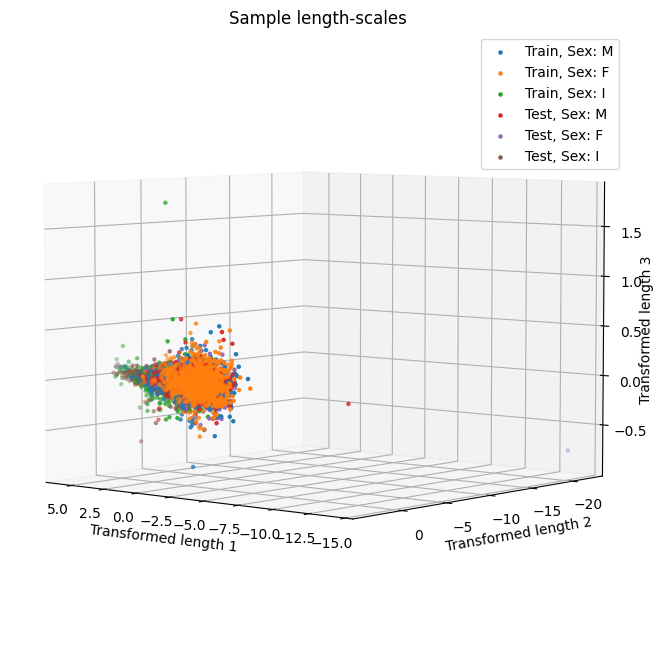

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for sex in ['M', 'F', 'I']:
  ax.scatter(X_train.length_transformed_1[X_train.Sex==sex], X_train.length_transformed_2[X_train.Sex==sex], X_train.length_transformed_3[X_train.Sex==sex], marker='.', label=f'Train, Sex: {sex}')
for sex in ['M', 'F', 'I']:
  ax.scatter(X_test.length_transformed_1[X_test.Sex==sex], X_test.length_transformed_2[X_test.Sex==sex], X_test.length_transformed_3[X_test.Sex==sex], marker='.', label=f'Test, Sex: {sex}')
ax.set_xlabel('Transformed length 1')
ax.set_ylabel('Transformed length 2')
ax.set_zlabel('Transformed length 3')
ax.zaxis.labelpad = -3. #So that the z-label fits in and shows up.
ax.view_init(elev=5, azim=130, roll=0) #View angle of the 3D plot
plt.legend()
plt.title('Sample length-scales')
plt.show()

## What about weight scales? It seems from the PCA variances it is best to keep at least the top 3 weight scales.

In [ ]:
features_pca = ['Whole_weight_scaled', 'Shucked_weight_scaled', 'Viscera_weight_scaled', 'Shell_weight_scaled']
pca = PCA(n_components=len(features_pca))
pca.fit(X_train[features_pca])

PCA(n_components=4)

In [ ]:
print(pca.explained_variance_ratio_)

[0.9520902  0.02997774 0.01654205 0.00139001]


In [ ]:
features_to_transform = features_pca
features_transformed = [f'weight_transformed_{i}' for i in range(1,len(features_to_transform)+1)]
X_train[features_transformed] = pca.transform(X_train[features_to_transform])
X_test[features_transformed] = pca.transform(X_test[features_to_transform])

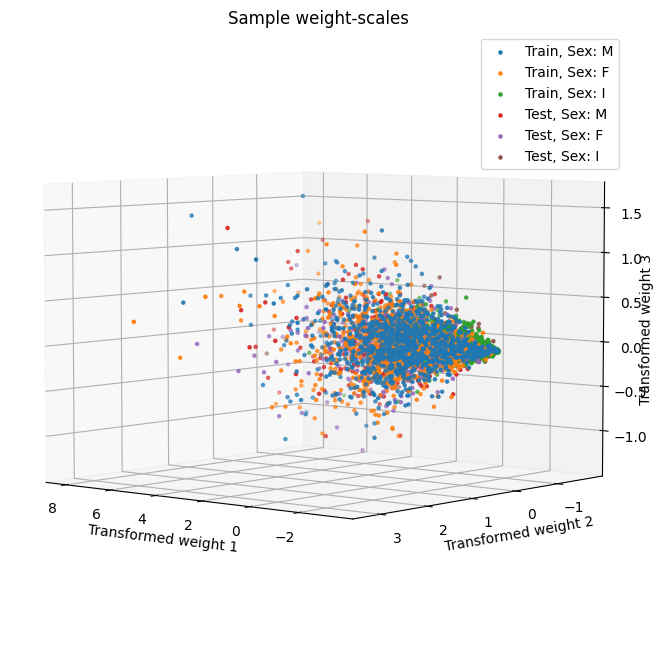

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
for sex in ['M', 'F', 'I']:
  ax.scatter(X_train.weight_transformed_1[X_train.Sex==sex], X_train.weight_transformed_2[X_train.Sex==sex], X_train.weight_transformed_3[X_train.Sex==sex], marker='.', label=f'Train, Sex: {sex}')
for sex in ['M', 'F', 'I']:
  ax.scatter(X_test.weight_transformed_1[X_test.Sex==sex], X_test.weight_transformed_2[X_test.Sex==sex], X_test.weight_transformed_3[X_test.Sex==sex], marker='.', label=f'Test, Sex: {sex}')
ax.set_xlabel('Transformed weight 1')
ax.set_ylabel('Transformed weight 2')
ax.set_zlabel('Transformed weight 3')
ax.zaxis.labelpad = -3. #So that the z-label fits in and shows up.
ax.view_init(elev=5, azim=130, roll=0) #View angle of the 3D plot
plt.legend()
plt.title('Sample weight-scales')
plt.show()

## Let's try PCA over all the lengths and weights as well.

In [ ]:
features_pca = ['Length_scaled', 'Diameter_scaled', 'Height_scaled', 'Whole_weight_scaled', 'Shucked_weight_scaled', 'Viscera_weight_scaled', 'Shell_weight_scaled']
pca = PCA(n_components=len(features_pca))
pca.fit(X_train[features_pca])

PCA(n_components=7)

In [ ]:
print(pca.explained_variance_ratio_)

[9.24583460e-01 3.01359583e-02 2.02597930e-02 1.29508624e-02
 9.31178053e-03 1.96945183e-03 7.88693694e-04]


## Try out the different regressors related to decision trees.

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score
from sklearn.tree import plot_tree

In [ ]:
X_train.loc[X_train.Sex=='M', 'Sex'] = -1
X_train.loc[X_train.Sex=='F', 'Sex'] = 1
X_train.loc[X_train.Sex=='I', 'Sex'] = 0

X_test.loc[X_test.Sex=='M', 'Sex'] = -1
X_test.loc[X_test.Sex=='F', 'Sex'] = 1
X_test.loc[X_test.Sex=='I', 'Sex'] = 0

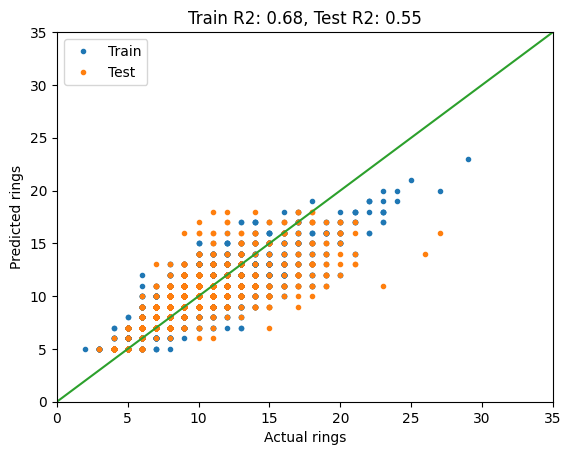

In [ ]:
# Random forest
features = [f'length_transformed_{i}' for i in range(1,4)] + [f'weight_transformed_{i}' for i in range(1,5)] + ['Sex']
regr = RandomForestRegressor(random_state=1, n_estimators=500, max_leaf_nodes=40)
regr.fit(X_train[features], y_train.Rings)

train_pred = regr.predict(X_train[features])
train_pred = np.rint(train_pred[np.newaxis, :])
test_pred = regr.predict(X_test[features])
test_pred = np.rint(test_pred[np.newaxis, :])

plt.plot(y_train.Rings, train_pred[0], '.', label='Train')
plt.plot(y_test.Rings, test_pred[0], '.', label='Test')
plt.plot([0,35], [0,35], '-')
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel('Actual rings')
plt.ylabel('Predicted rings')
plt.legend()
plt.title(f'Train R2: {r2_score(y_train.Rings, train_pred[0]):.2f}, Test R2: {r2_score(y_test.Rings, test_pred[0]):.2f}')
plt.show()

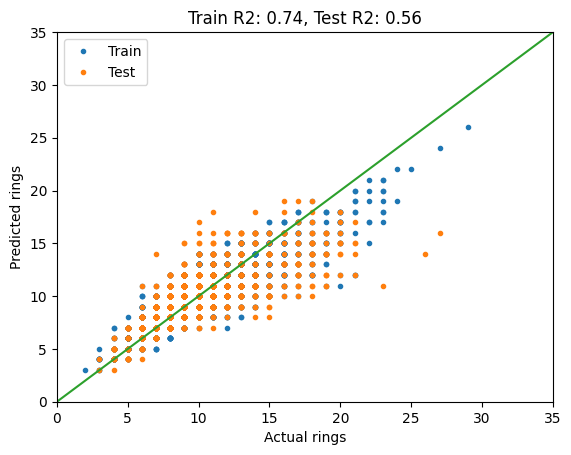

In [ ]:
# Gradient boosting
features = [f'length_transformed_{i}' for i in range(1,4)] + [f'weight_transformed_{i}' for i in range(1,5)] + ['Sex']
regr = GradientBoostingRegressor(random_state=1, n_estimators=200, max_leaf_nodes=10)
regr.fit(X_train[features], y_train.Rings)

train_pred = regr.predict(X_train[features])
train_pred = np.rint(train_pred[np.newaxis, :])
test_pred = regr.predict(X_test[features])
test_pred = np.rint(test_pred[np.newaxis, :])

plt.plot(y_train.Rings, train_pred[0], '.', label='Train')
plt.plot(y_test.Rings, test_pred[0], '.', label='Test')
plt.plot([0,35], [0,35], '-')
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel('Actual rings')
plt.ylabel('Predicted rings')
plt.legend()
plt.title(f'Train R2: {r2_score(y_train.Rings, train_pred[0]):.2f}, Test R2: {r2_score(y_test.Rings, test_pred[0]):.2f}')
plt.show()

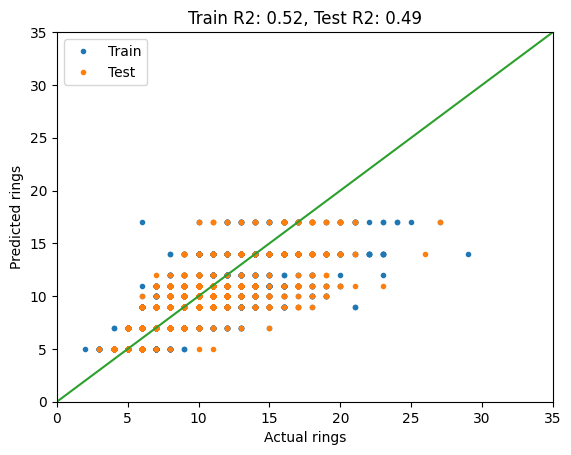

In [ ]:
# Basic decision tree
features = [f'length_transformed_{i}' for i in range(1,4)] + [f'weight_transformed_{i}' for i in range(1,5)] + ['Sex']
regr = DecisionTreeRegressor(random_state=1, max_leaf_nodes=10)
regr.fit(X_train[features], y_train.Rings)

train_pred = regr.predict(X_train[features])
train_pred = np.rint(train_pred[np.newaxis, :])
test_pred = regr.predict(X_test[features])
test_pred = np.rint(test_pred[np.newaxis, :])

plt.plot(y_train.Rings, train_pred[0], '.', label='Train')
plt.plot(y_test.Rings, test_pred[0], '.', label='Test')
plt.plot([0,35], [0,35], '-')
plt.xlim(0,35)
plt.ylim(0,35)
plt.xlabel('Actual rings')
plt.ylabel('Predicted rings')
plt.legend()
plt.title(f'Train R2: {r2_score(y_train.Rings, train_pred[0]):.2f}, Test R2: {r2_score(y_test.Rings, test_pred[0]):.2f}')
plt.show()

In [ ]:
regr.feature_importances_

array([0.32259311, 0.        , 0.        , 0.        , 0.61599401,
       0.        , 0.06141288, 0.        ])

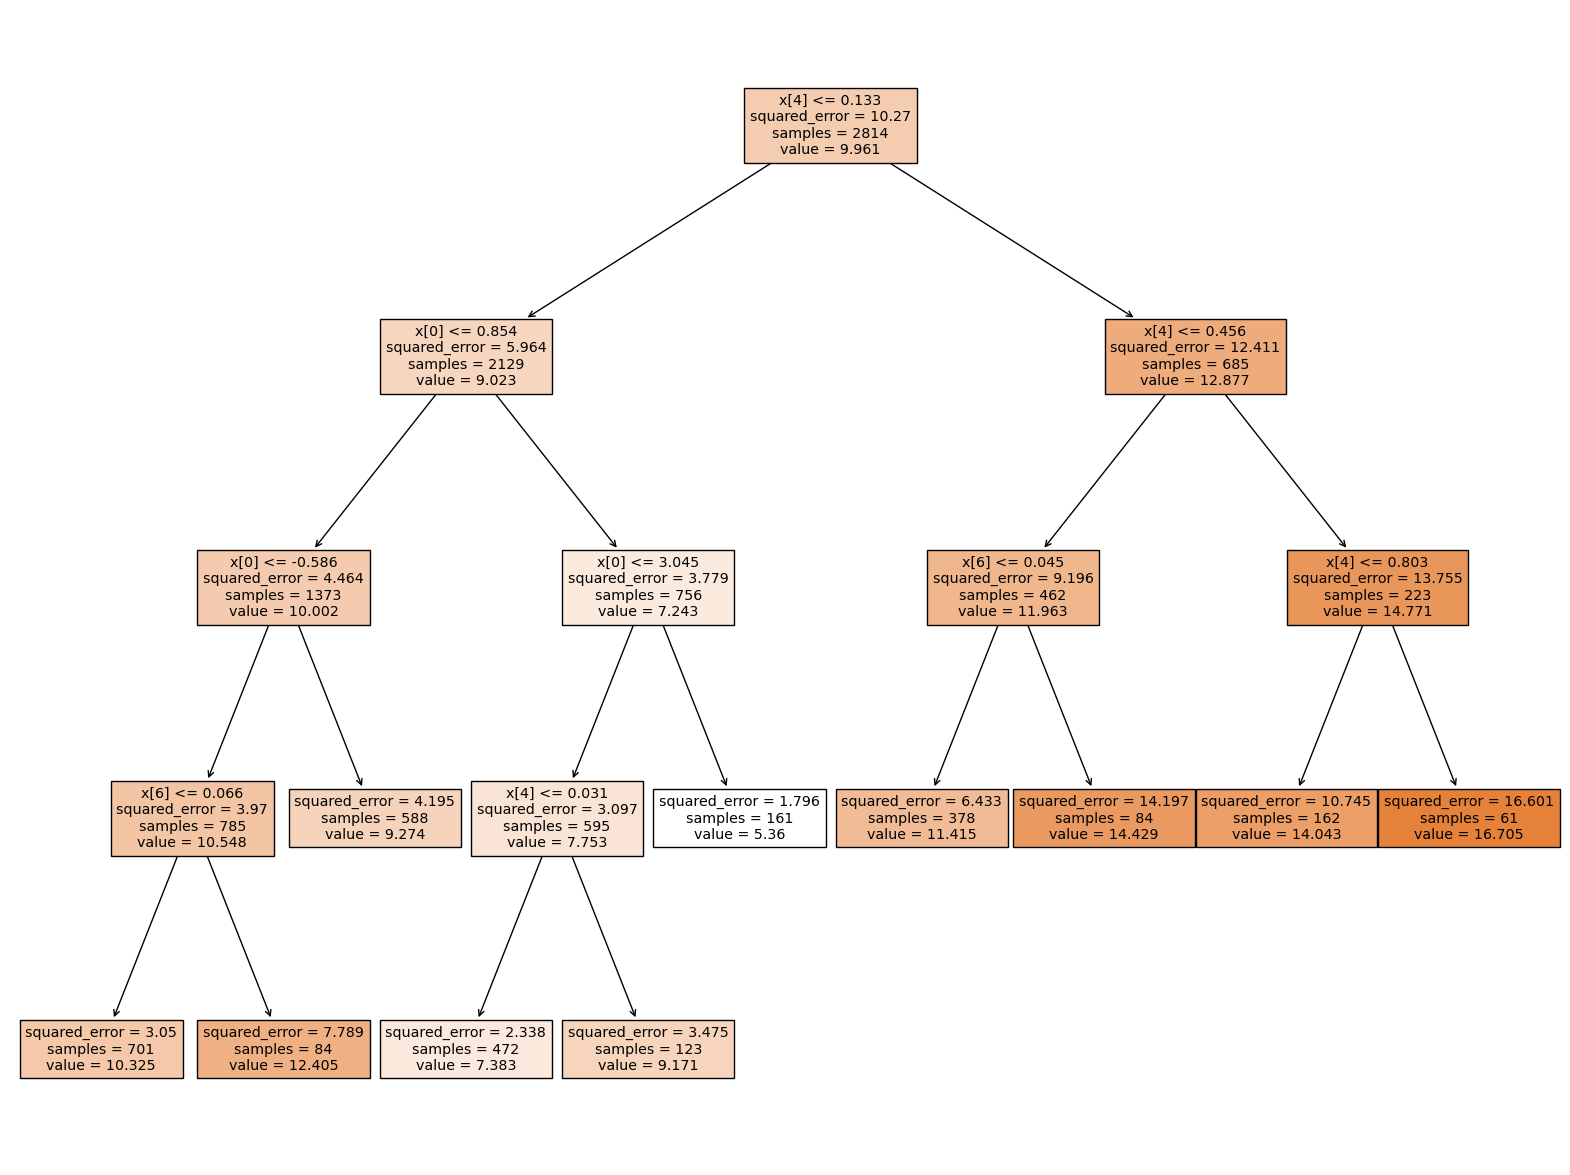

In [ ]:
plt.figure(figsize=(20,15))
plot_tree(regr, filled=True)
plt.show()

## Plot the rings over the 2 dominating features. There is indeed a spread in ring values for most feature space values.

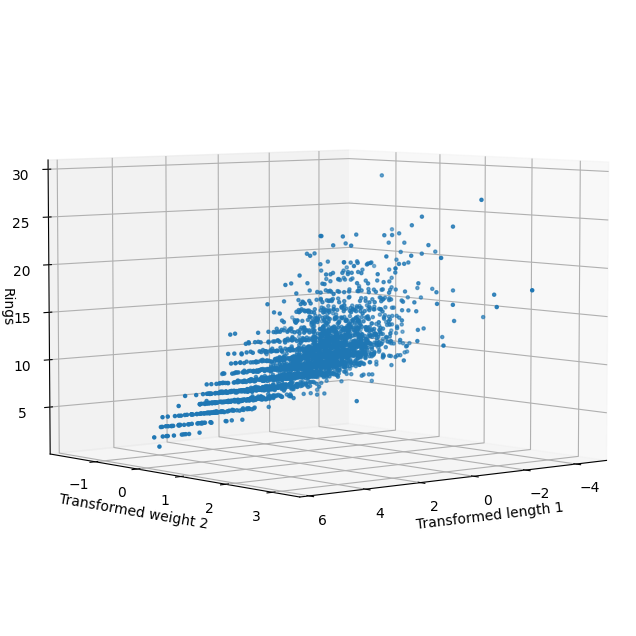

In [ ]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train.length_transformed_1, X_train.weight_transformed_2, y_train, marker='.')
ax.set_xlabel('Transformed length 1')
ax.set_ylabel('Transformed weight 2')
ax.set_zlabel('Rings')
ax.zaxis.labelpad = -3. #So that the z-label fits in and shows up.
ax.view_init(elev=5, azim=50, roll=0) #View angle of the 3D plot
plt.show()